In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
df = pd.read_csv('https://raw.githubusercontent.com/tisheedesh/Project/main/Data/data_processed.csv').drop(['Unnamed: 0'], axis=1)

In [311]:
df.columns

Index(['Артикул', 'Для кого', 'Примерный вес', 'Тип металла', 'Проба',
       'Покрытие', 'Тип вставки', 'Форма вставки', 'Количество', 'Цвет', 'Вес',
       'Тип вставки 2', 'Форма вставки 2', 'Количество 2', 'Цвет 2', 'Вес 2',
       'Ширина кольца', 'Ширина', 'Высота', 'Номер страницы',
       'Цена со скидкой', 'Цена без скидки'],
      dtype='object')

In [312]:
df.describe()

,Примерный вес,Проба,Количество,Вес,Количество 2,Вес 2,Ширина кольца,Ширина,Высота,Номер страницы,Цена со скидкой,Цена без скидки
count,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8492.000000,8.492000e+03,8.492000e+03
mean,2.269896,669.340556,7.772374,0.690260,4.677343,0.154182,2.249812,7.606000,3.755768,73.304522,4.208324e+04,9.857831e+04
std,1.229823,158.022857,18.015935,1.281404,10.621306,0.564410,1.227961,3.367311,1.372621,41.798467,8.773680e+04,1.978102e+05
min,0.170000,375.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.400000e+02,9.900000e+02
25%,1.490000,585.000000,1.000000,0.065000,0.000000,0.000000,2.000000,6.000000,3.755826,38.000000,5.850000e+03,1.299000e+04
50%,1.980000,585.000000,1.000000,0.267000,0.000000,0.000000,2.000000,7.605504,3.755826,73.000000,2.160000e+04,5.299000e+04
75%,2.680000,925.000000,6.000000,0.752000,4.000000,0.102000,2.249783,7.605504,4.000000,110.000000,4.200000e+04,9.999000e+04
max,14.600000,1000.000000,253.000000,18.705000,143.000000,11.099000,20.000000,110.000000,32.000000,146.000000,2.747250e+06,6.104990e+06


In [313]:
df.loc[df['Ширина'] == df['Ширина'].max(), 'Артикул']

1065    2011268
Name: Артикул, dtype: object

<Axes: >

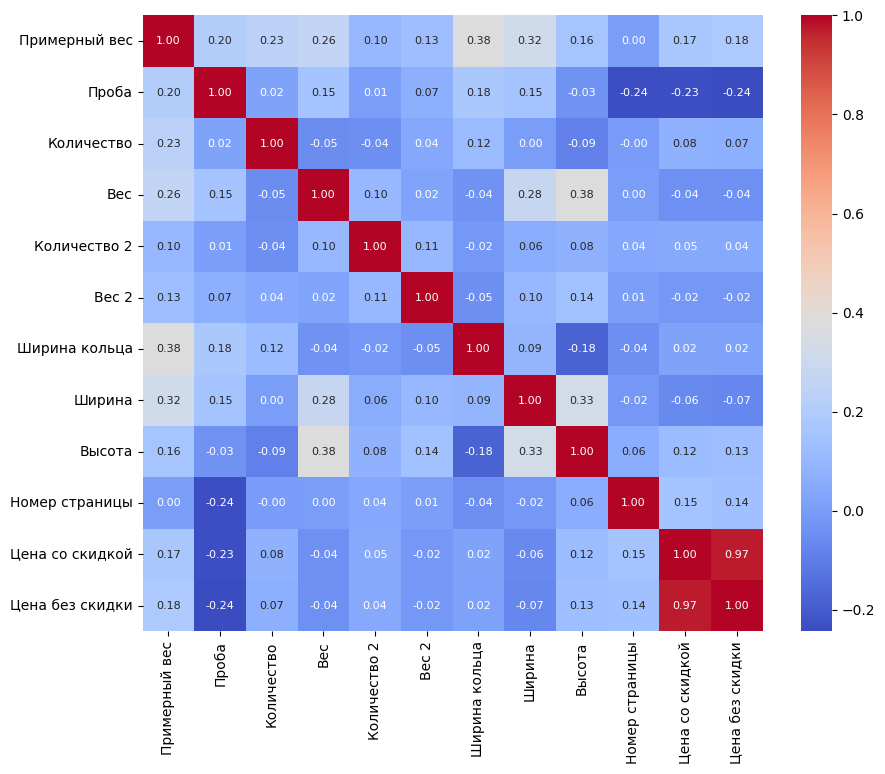

In [314]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt="0.2f", annot_kws={"size":8})

In [315]:
# 'Для кого', 'Тип металла', 'Покрытие', 'Тип вставки', 'Форма вставки', 'Цвет', 'Тип вставки 2', 'Форма вставки 2', 'Цвет 2'

In [336]:
df = df.drop(df.loc[df['Тип вставки 2'] != 'Без вставок'].index)

In [337]:
# for c in ['Тип вставки']:
#     df = df.loc[~df[c].isin(df[c].value_counts()[(df[c].value_counts() < 100)].index)]

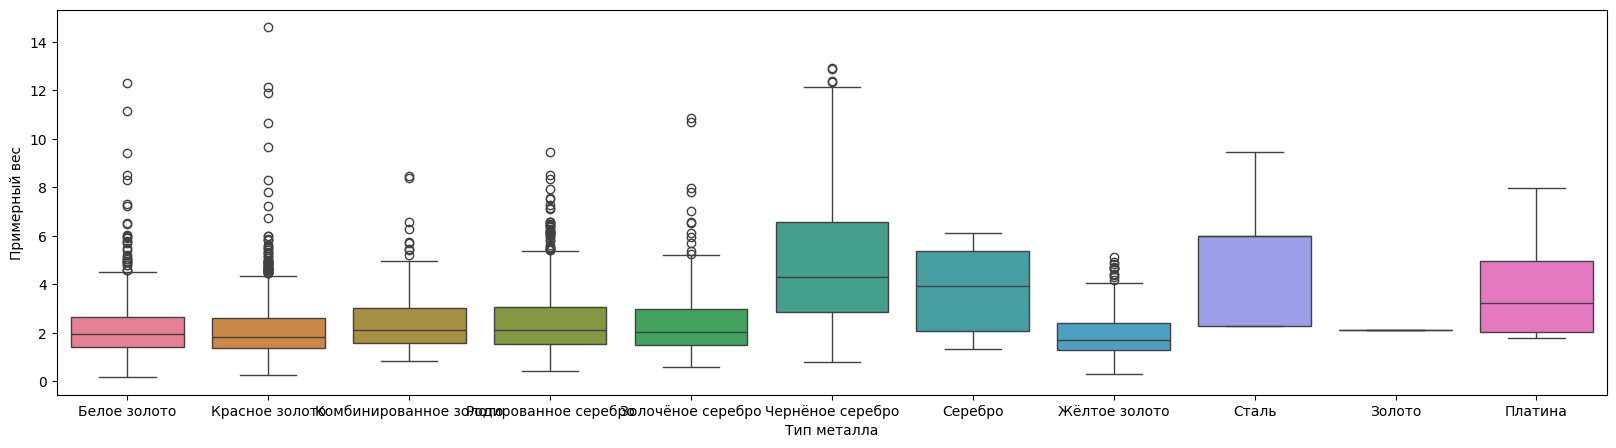

In [338]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.boxplot(df, x='Тип металла', y='Примерный вес', hue='Тип металла')
plt.show()

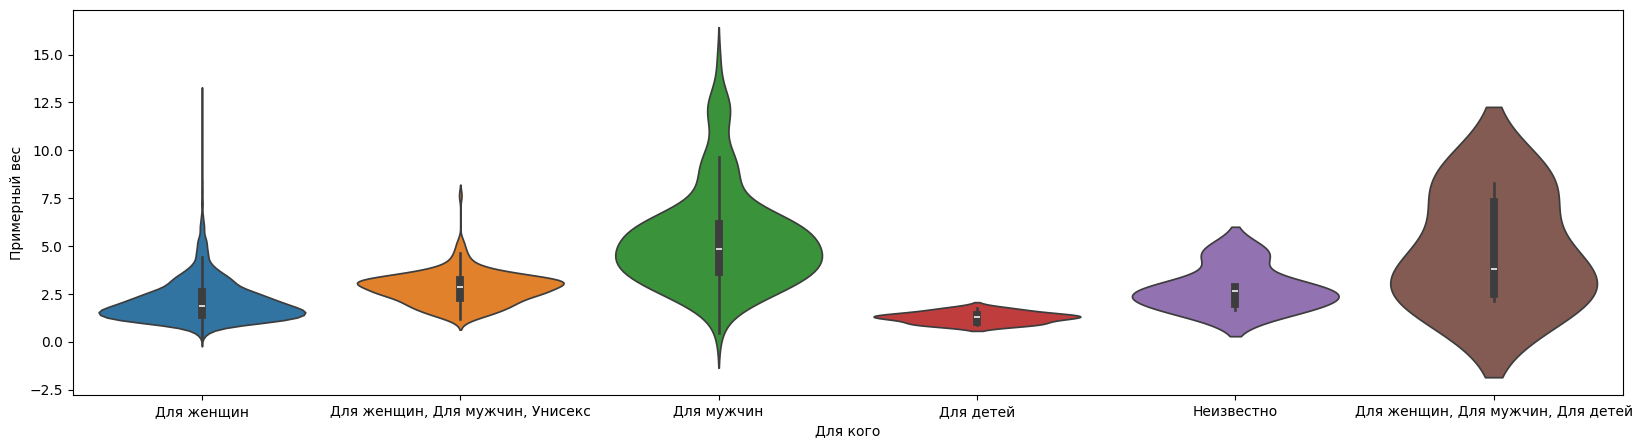

In [339]:
fig, ax = plt.subplots(figsize = (20, 5))
sns.violinplot(df, x='Для кого', y='Примерный вес', hue='Для кого')
plt.show()

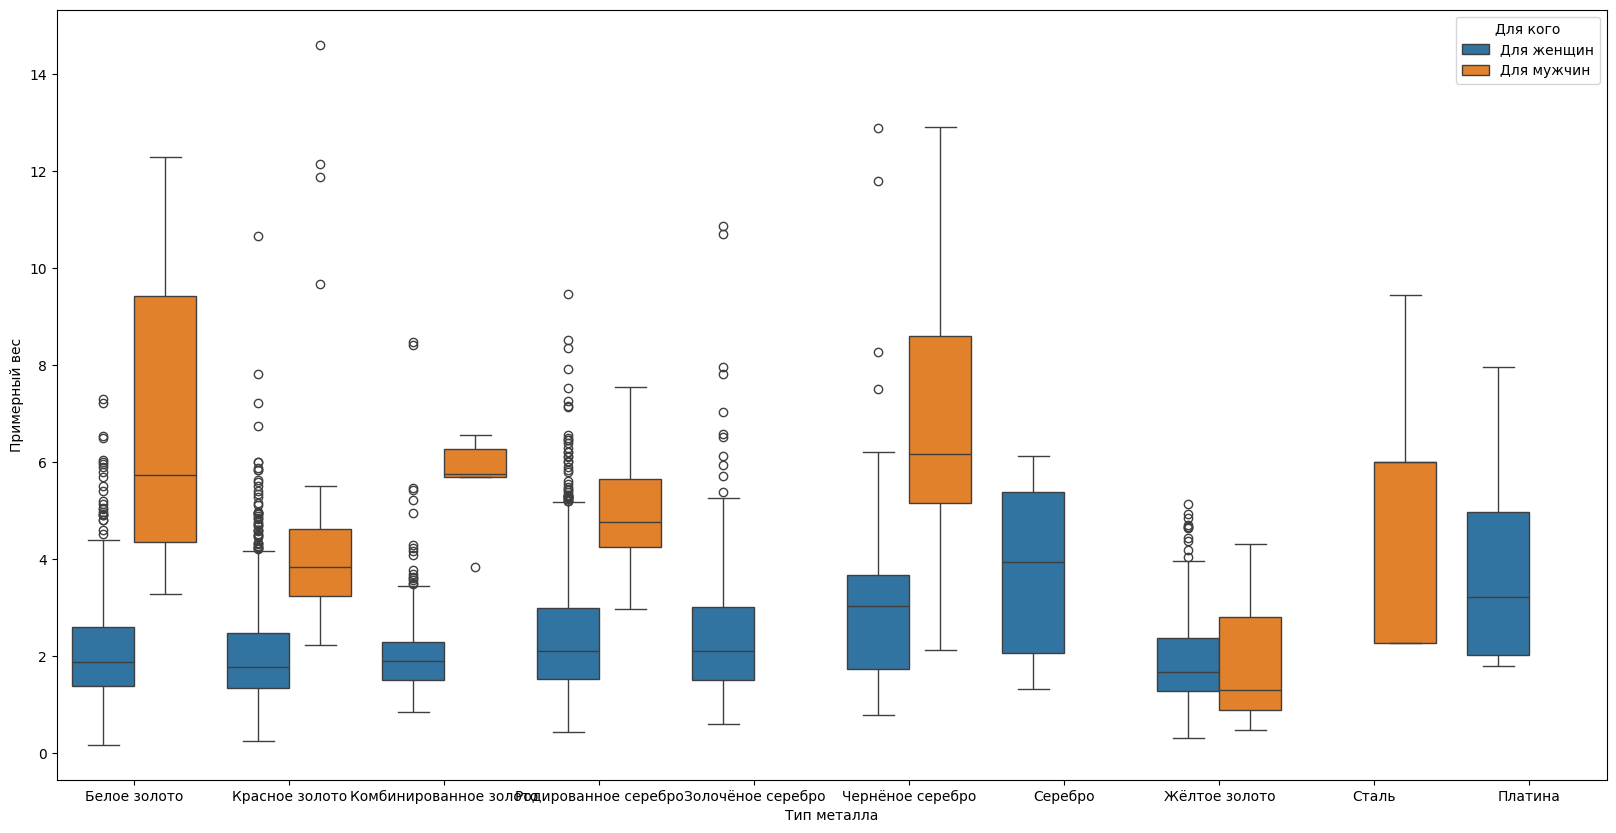

In [340]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.boxplot(df.loc[(df['Для кого'] == 'Для мужчин') | (df['Для кого'] == 'Для женщин')], x='Тип металла', y='Примерный вес', hue='Для кого')
plt.show()

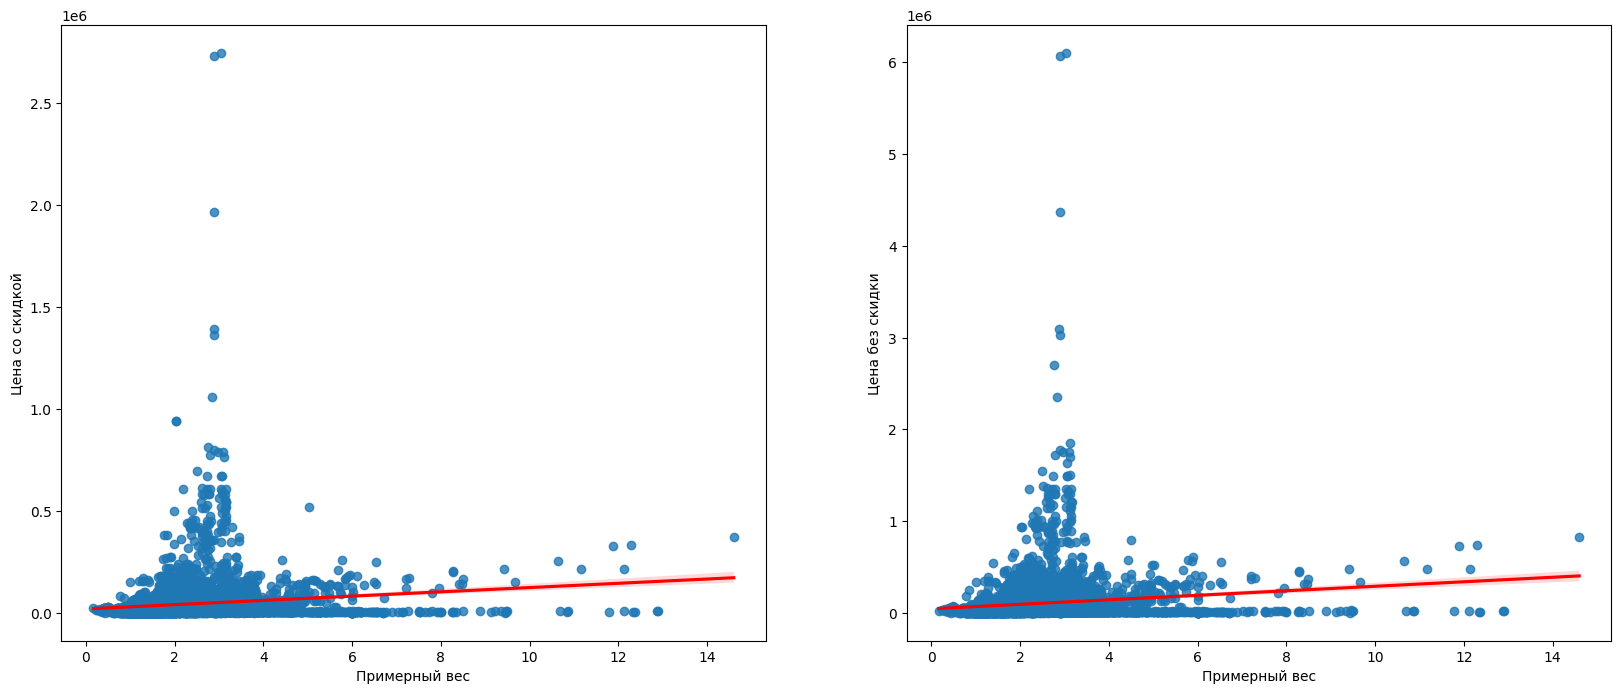

In [341]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.regplot(df, y='Цена со скидкой', x='Примерный вес', line_kws={'color' : 'red'}, ax=ax[0])
sns.regplot(df, y='Цена без скидки', x='Примерный вес', line_kws={'color' : 'red'}, ax=ax[1])
plt.show()

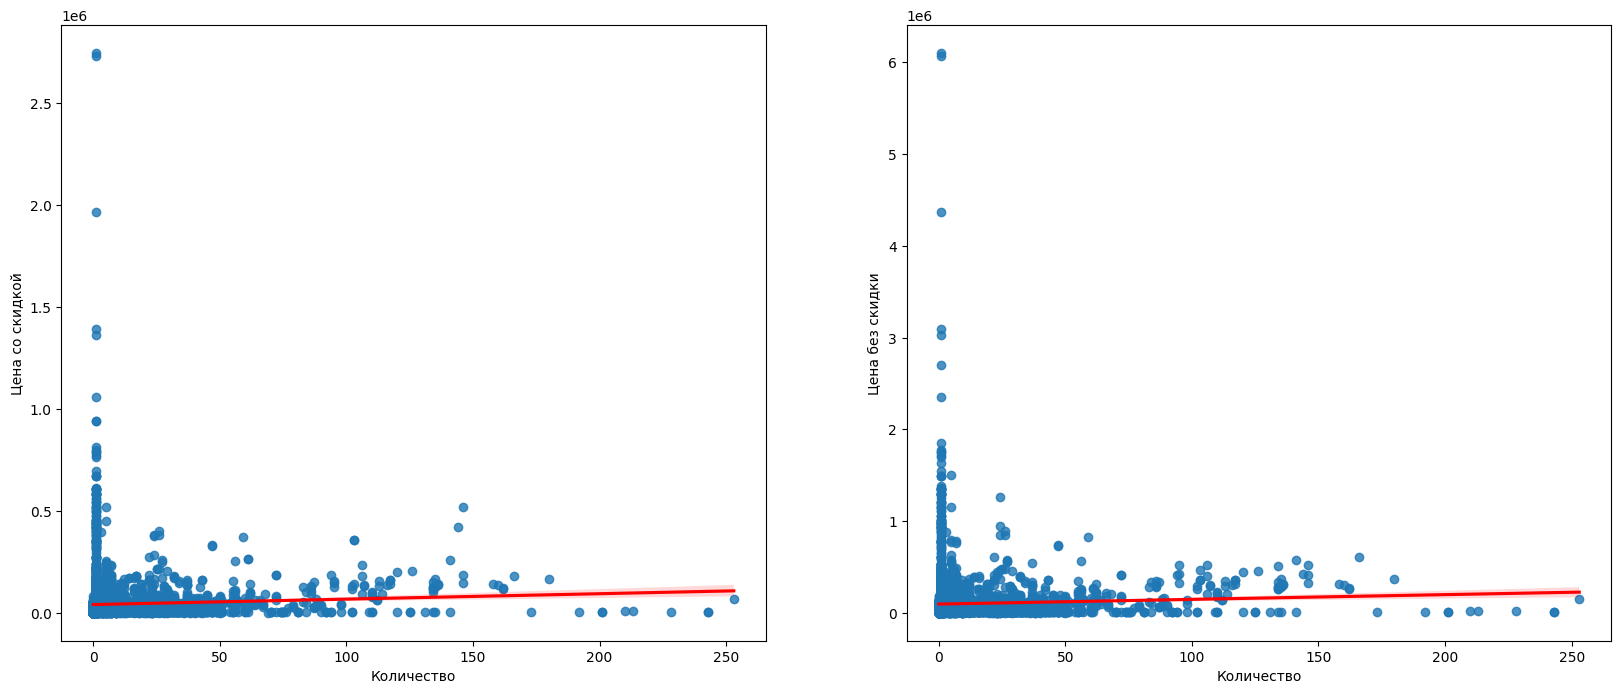

In [342]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.regplot(df, y='Цена со скидкой', x='Количество', line_kws={'color' : 'red'}, ax=ax[0])
sns.regplot(df, y='Цена без скидки', x='Количество', line_kws={'color' : 'red'}, ax=ax[1])
plt.show()

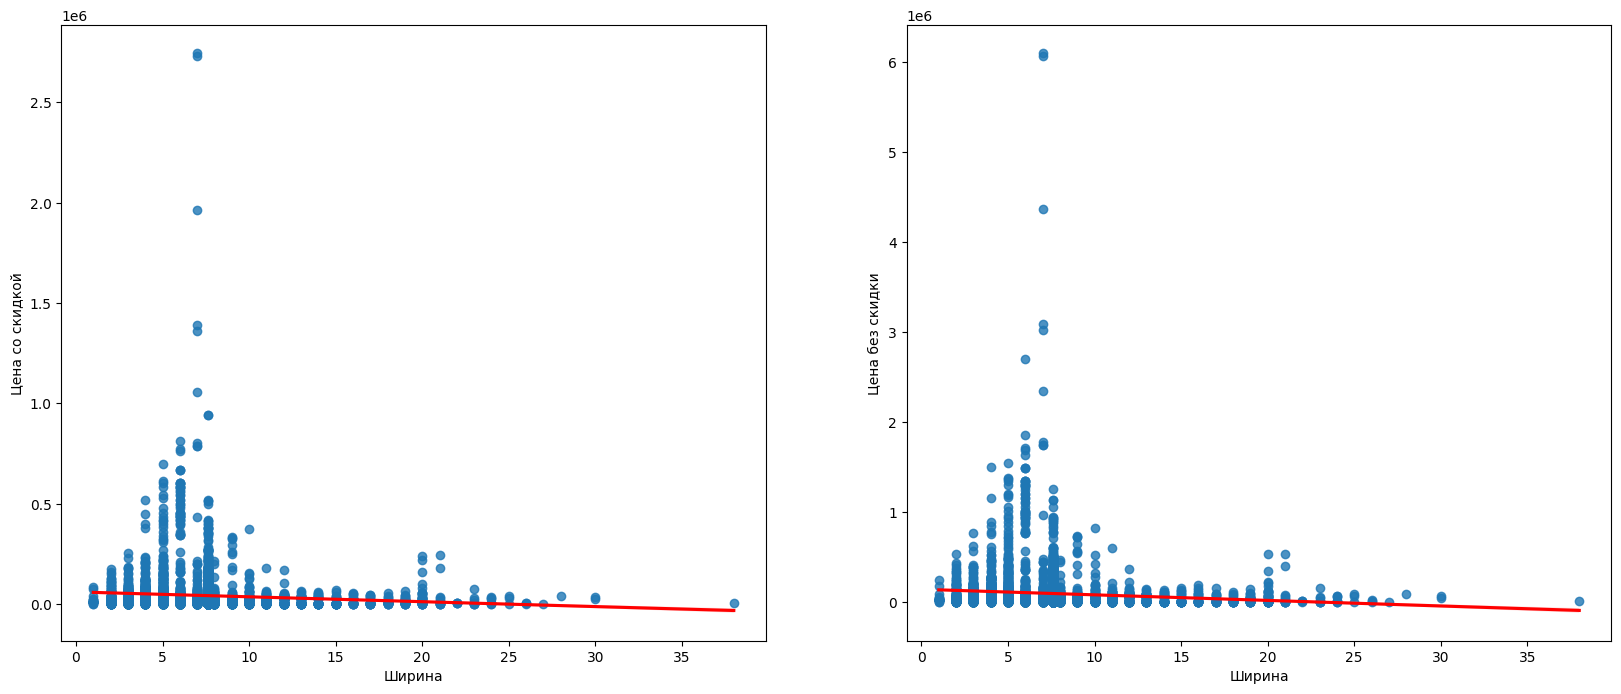

In [343]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.regplot(df, y='Цена со скидкой', x='Ширина', line_kws={'color' : 'red'}, ax=ax[0])
sns.regplot(df, y='Цена без скидки', x='Ширина', line_kws={'color' : 'red'}, ax=ax[1])
plt.show()

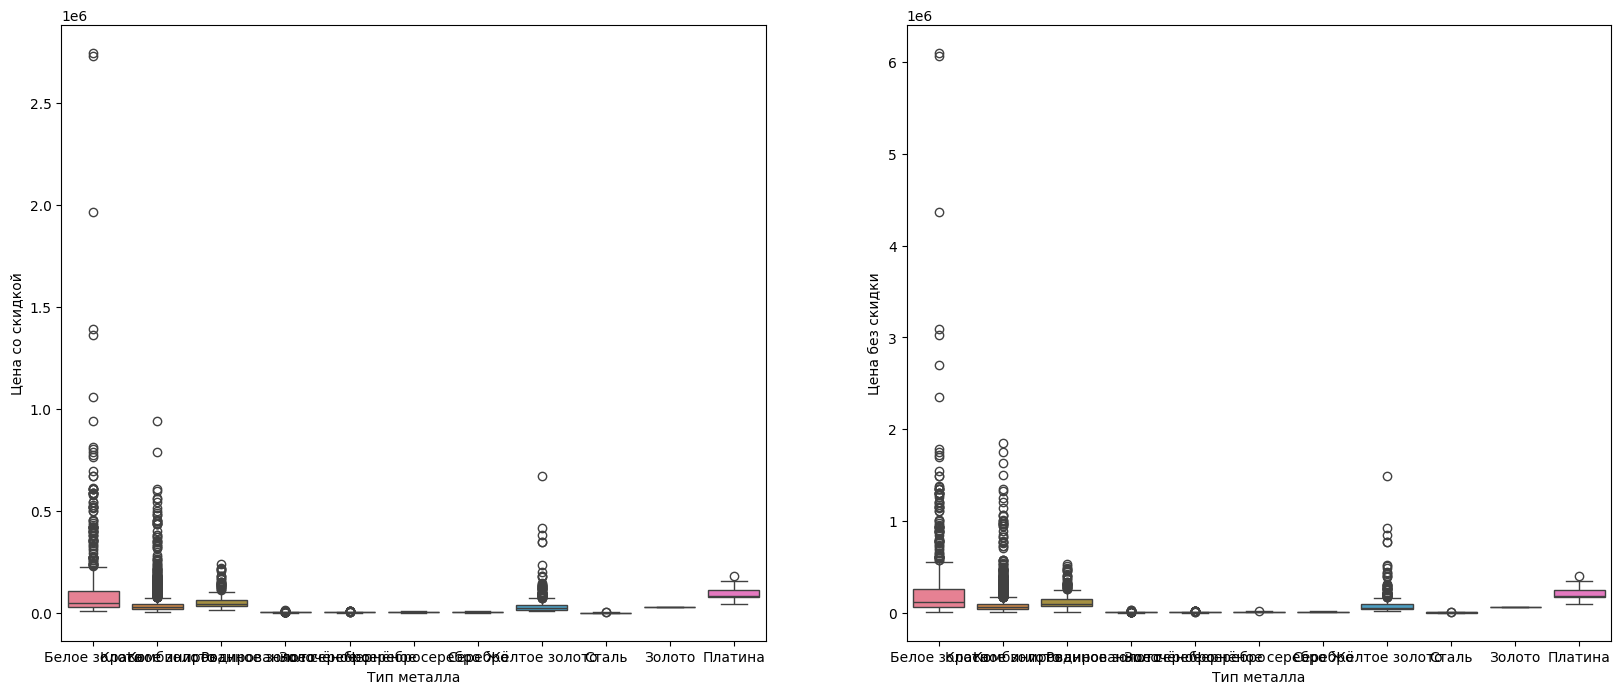

In [344]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.boxplot(df, y='Цена со скидкой', x='Тип металла', hue='Тип металла', ax=ax[0])
sns.boxplot(df, y='Цена без скидки', x='Тип металла', hue='Тип металла', ax=ax[1])
plt.show()

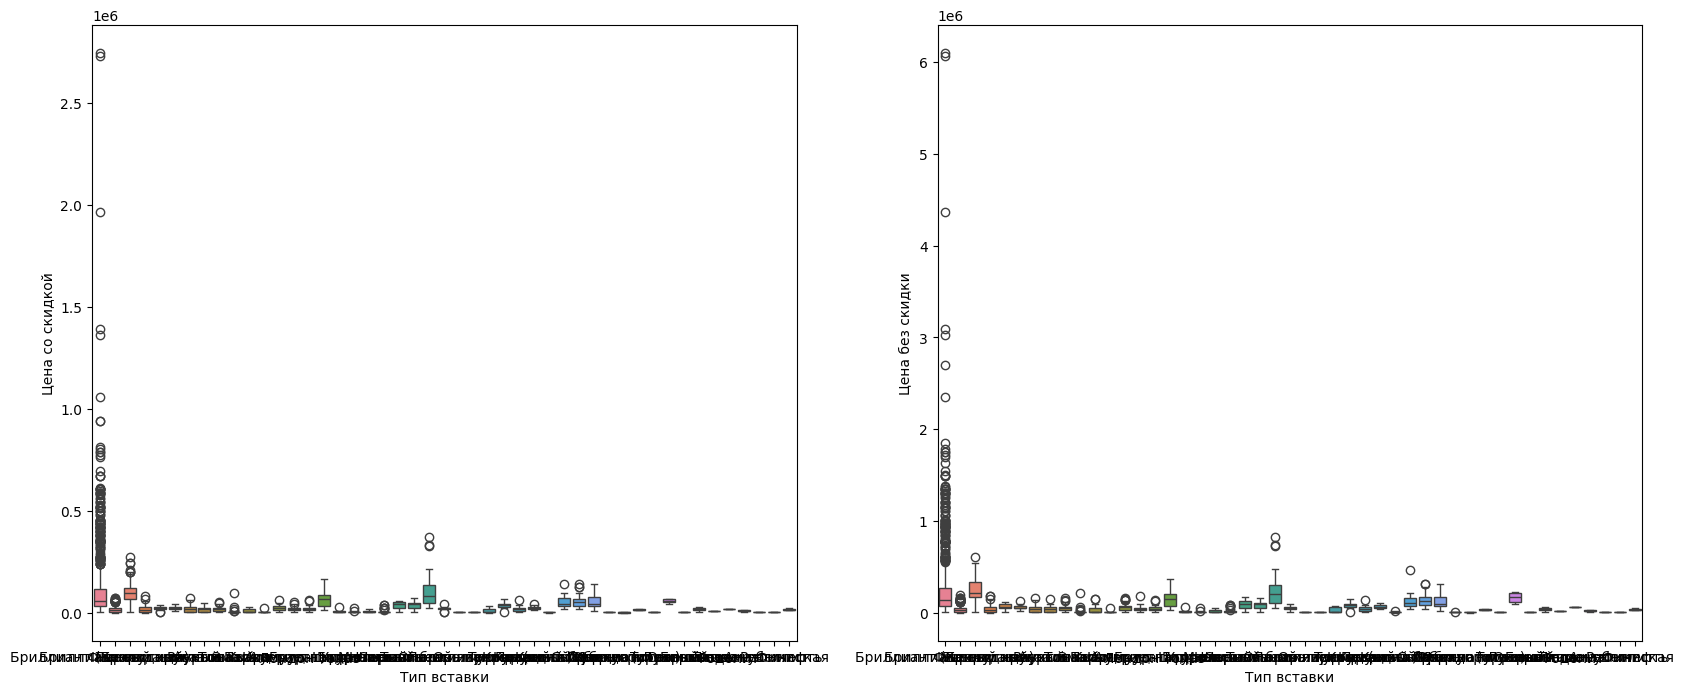

In [345]:
fig, ax = plt.subplots(figsize = (20, 8), ncols=2)
sns.boxplot(df, y='Цена со скидкой', x='Тип вставки', hue='Тип вставки', ax=ax[0])
sns.boxplot(df, y='Цена без скидки', x='Тип вставки', hue='Тип вставки', ax=ax[1])
plt.show()

In [346]:
for c in df.columns:
    display(df[c].value_counts())
    print()

Артикул
1011493        1
714639         1
716203-3       1
716077-2       1
716071         1
              ..
716797         1
716235         1
714957         1
6014307-3      1
95010128-91    1
Name: count, Length: 5081, dtype: int64

Для кого
Для женщин                           4657
Для женщин, Для мужчин, Унисекс       227
Для мужчин                            164
Для детей                              17
Неизвестно                             10
Для женщин, Для мужчин, Для детей       6
Name: count, dtype: int64

Примерный вес
1.28     36
1.61     36
1.67     35
1.12     35
1.23     33
         ..
6.77      1
5.95      1
3.95      1
10.69     1
9.12      1
Name: count, Length: 584, dtype: int64

Тип металла
Красное золото            1980
Родированное серебро      1132
Белое золото               831
Жёлтое золото              492
Комбинированное золото     288
Золочёное серебро          205
Чернёное серебро            94
Сталь                       25
Серебро                     18
Платина                     15
Золото                       1
Name: count, dtype: int64

Проба
585.0     3451
925.0     1449
375.0      138
1000.0      25
950.0       15
750.0        3
Name: count, dtype: int64

Покрытие
Родирование                             2550
Неизвестно                              2004
Золочение                                151
Алмазная грань,  Родирование             119
Золочение,  Родирование                   81
Эмаль                                     76
Алмазная грань                            55
Родирование,  Эмаль                       11
Гравировка                                 9
Золочение,  Эмаль                          7
Золочение,  Родирование,  Эмаль            7
Гравировка,  Родирование                   6
Чернение                                   2
Гравировка,  Золочение                     1
Лазерная обработка,  Родирование           1
Алмазная грань,  Родирование,  Эмаль       1
Name: count, dtype: int64

Тип вставки
Фианит                             1720
Бриллиант (природный)              1386
Без вставок                         978
Топаз                               136
Эмаль                               112
Бриллиант выращенный                 71
Аметист                              55
Гранат                               46
Жемчуг натуральный                   40
Корунд                               39
Лондон топаз                         37
Агат                                 33
Ситалл                               32
Кристалл                             30
Раухтопаз                            29
Черный бриллиант                     29
Сапфир                               29
Кварц                                29
Коньячный бриллиант                  24
Изумруд натуральный                  24
Горный хрусталь                      21
Танзанит                             20
Жемчуг (синт.)                       18
Янтарь прессованный                  18
Наношпинель                 

Форма вставки
Круг           3414
Без вставок     978
Овал            138
Неизвестно      128
Груша            80
Маркиз           63
Октагон          62
Квадрат          55
Багет            39
Сердце           37
Триллион         34
Антик            24
Принцесса        14
Волна            10
Кушон             4
Шар               1
Name: count, dtype: int64

Количество
1.0      2369
0.0       978
5.0       157
7.0       122
3.0       113
         ... 
131.0       1
253.0       1
109.0       1
166.0       1
59.0        1
Name: count, Length: 118, dtype: int64

Цвет
Бесцветный     3134
Без вставок     978
Голубой         188
Неизвестно      136
Зелёный         136
Чёрный           92
Красный          78
Синий            75
Сиреневый        73
Белый            53
Коричневый       48
Розовый          38
Жёлтый           28
Коньячный        24
Name: count, dtype: int64

Вес
0.000     978
0.451     134
0.480     109
0.846      91
0.201      88
         ... 
0.166       1
2.015       1
1.254       1
4.353       1
18.705      1
Name: count, Length: 978, dtype: int64

Тип вставки 2
Без вставок    5081
Name: count, dtype: int64

Форма вставки 2
Без вставок    5081
Name: count, dtype: int64

Количество 2
0.0    5081
Name: count, dtype: int64

Цвет 2
Без вставок    5081
Name: count, dtype: int64

Вес 2
0.0    5081
Name: count, dtype: int64

Ширина кольца
2.249783     1875
2.000000     1738
1.000000      653
3.000000      375
4.000000      167
5.000000       75
6.000000       68
7.000000       42
8.000000       35
9.000000       12
11.000000      12
10.000000      11
15.000000       5
12.000000       4
13.000000       4
17.000000       3
20.000000       1
14.000000       1
Name: count, dtype: int64

Ширина
7.605504     2382
4.000000      371
5.000000      347
6.000000      322
3.000000      319
7.000000      241
8.000000      168
9.000000      147
2.000000      137
11.000000     111
10.000000     110
12.000000      88
13.000000      55
20.000000      41
19.000000      35
15.000000      34
14.000000      34
16.000000      25
18.000000      24
17.000000      23
1.000000       21
21.000000      13
23.000000      10
24.000000       8
22.000000       4
26.000000       3
25.000000       3
30.000000       2
38.000000       1
27.000000       1
28.000000       1
Name: count, dtype: int64

Высота
3.755826     2389
2.000000      628
3.000000      524
4.000000      453
1.000000      397
5.000000      369
6.000000      180
7.000000       75
8.000000       27
9.000000       17
10.000000      13
11.000000       3
1.500000        2
13.000000       1
20.000000       1
12.000000       1
14.000000       1
Name: count, dtype: int64

Номер страницы
38     61
128    58
5      57
36     55
125    55
       ..
95      9
139     7
94      6
138     4
30      1
Name: count, Length: 146, dtype: int64

Цена со скидкой
21600     154
23850     135
26100     126
17100     121
28350     106
         ... 
178500      1
183000      1
771750      1
447750      1
5700        1
Name: count, Length: 452, dtype: int64

Цена без скидки
47990     168
52990     146
57990     137
37990     125
62990     123
         ... 
789990      1
764990      1
1190        1
999990      1
774990      1
Name: count, Length: 317, dtype: int64

In [347]:
df.shape

(5081, 22)